In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

#print("matplotlib version: {}".format(matplotlib.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))


path ='./F1.csv'  #F0 = all (3156488), F1 =10k
%time df = pd.read_csv(path)

mglearn version: 0.1.6
CPU times: user 21.7 ms, sys: 4.52 ms, total: 26.2 ms
Wall time: 30.3 ms


In [4]:
#dfa Family Income vs Property Value
df = df[(df.RELATE == 1)]  # Filter only head of household 
dfa =  df[['FTOTINC', 'US2016A_VALP']]
#dfa = dfa.rename(index=str, columns={"US2016A_ACR":"LOT_SIZE","US2016A_VALP":"Property_Value"})
dfa = dfa.rename(index=str, columns={"FTOTINC":"FAMIncome","US2016A_VALP":"Property_Value"})
dfa = dfa[ (dfa.Property_Value != 'BBBBBBB')]  #Remove people who dont own homes
dfa = dfa[(dfa.FAMIncome < 2500000)]  #Households that income is Less than 2.5M

dfa['FAMIncome'] = dfa['FAMIncome'].astype(int)/1000
dfa['Property_Value'] = dfa['Property_Value'].astype(int)/1000
#dfa





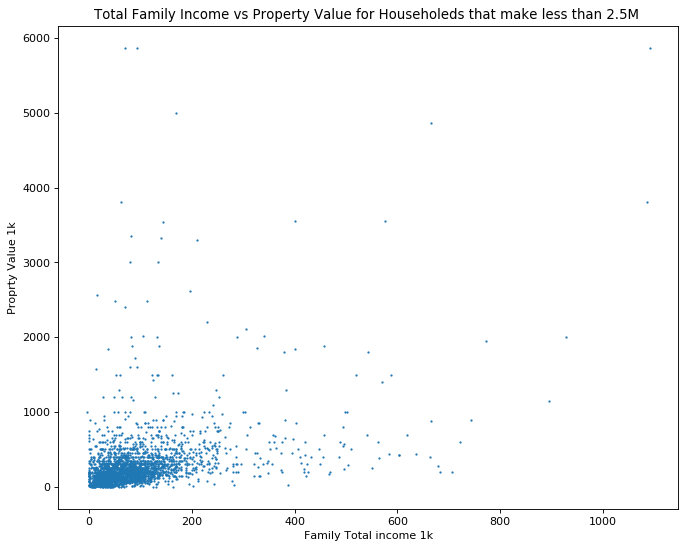

In [6]:
#dfa  Family Income Vs Proporty Value
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dfa.FAMIncome,dfa.Property_Value,s=1)
plt.xlabel("Family Total income 1k")
plt.ylabel("Proprty Value 1k")
plt.title("Total Family Income vs Property Value for Householeds that make less than 2.5M ")
#plt.xscale('log')
plt.show()

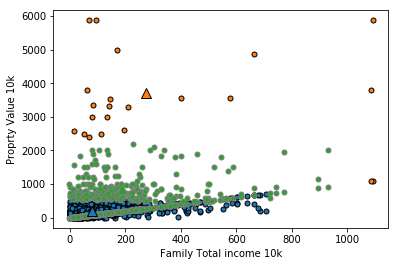

In [7]:
#Plot DFA Cluster  Family Income Vs Proprty Value
array_a = dfa.values
X = array_a
#km_a = KMeans(n_clusters=3, max_iter=300).fit(array_a)
km_a = KMeans(n_clusters=3, max_iter=300)
km_a.fit(X)

mglearn.discrete_scatter(X[:,0],X[:,], km_a.labels_,markers='.')
mglearn.discrete_scatter(
    km_a.cluster_centers_[:, 0], km_a.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=1)
plt.xlabel("Family Total income 10k")
plt.ylabel("Proprty Value 10k")
plt.show()

In [12]:
print ("cluster membership:\n{}".format(km_a.labels_))
print(km_a.predict(array_a))

cluster membership:
[0 0 0 ... 0 2 2]
[0 0 0 ... 0 2 2]


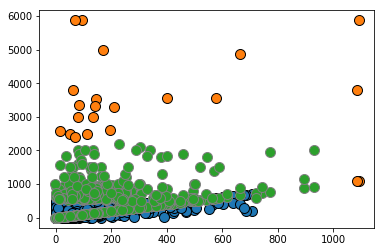

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,], km_a.labels_,markers='o')
#mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],markers='^',markeredgewidth=2)
plt.show()

In [15]:
#dfh Age vs Total Income
dfh = df[(df.INCTOT < 500000) & (df.INCTOT != 0) & (df.AGE < 65) & (df.AGE > 18) & (df.CITY != 0)]
dfh = dfh[['INCTOT','AGE']]
dfh

,INCTOT,AGE
32,50000,28
54,38000,38
78,35000,27
149,12000,26
154,48600,54
163,85000,52
166,22000,49
268,50000,39
271,94500,48
274,35000,45


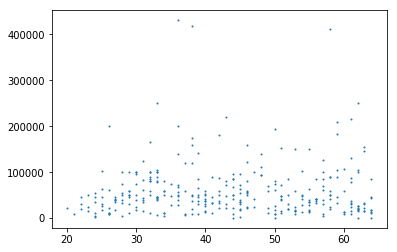

In [16]:
plt.scatter('AGE', 'INCTOT',data=dfh, s=1 )
plt.show()